In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [3]:
#reading weatherAus csv file dataset
df = pd.read_csv('weatherAUS.csv')

In [4]:
#1. Explorattory data analysis
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
df.shape #checking total numer of rows and columns in the dataset

(145460, 23)

In [6]:
#Dropping columns date and location as we are predicting rainfall in Australia and not location based prediction
#We are dropping date column also.
df = df.drop(columns=['Date', 'Location'], axis = 1)

In [7]:
df.shape

(145460, 21)

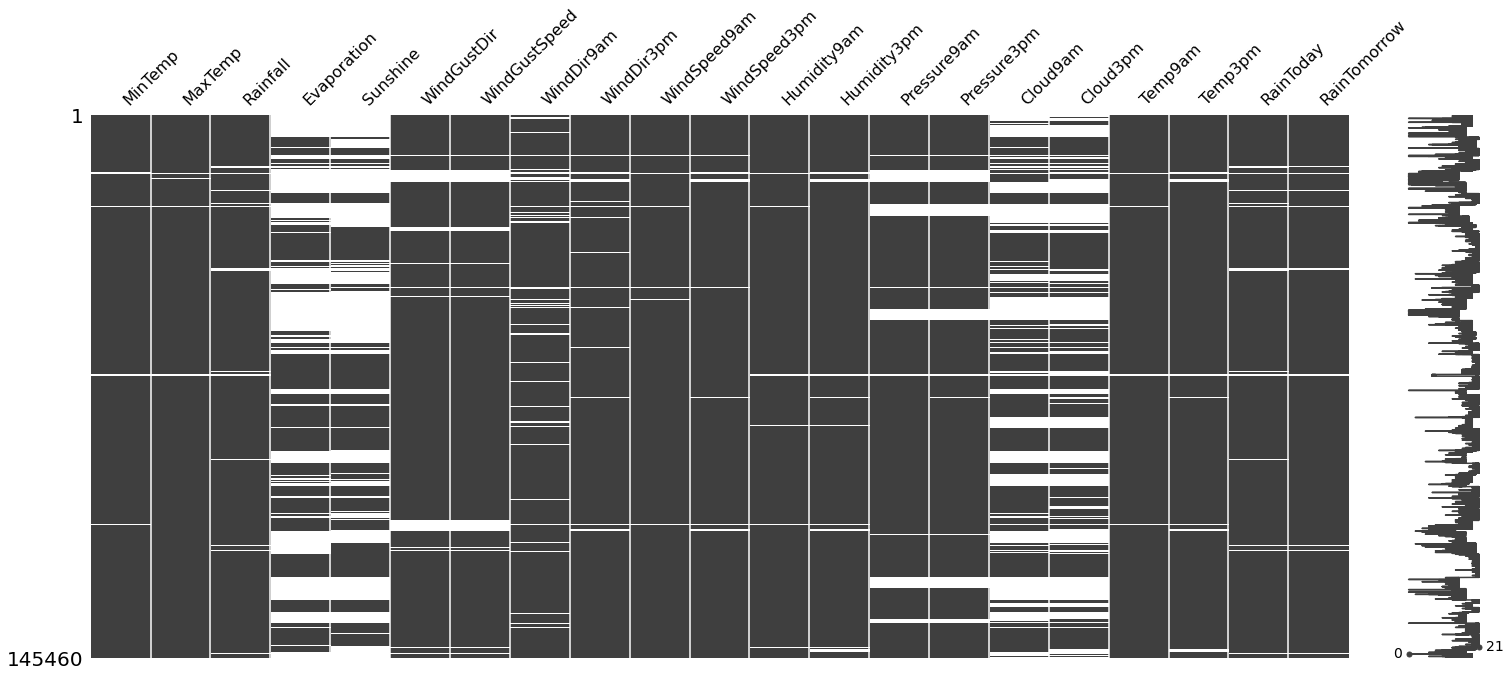

In [8]:
import missingno as msno
%matplotlib inline
msno.matrix(df)

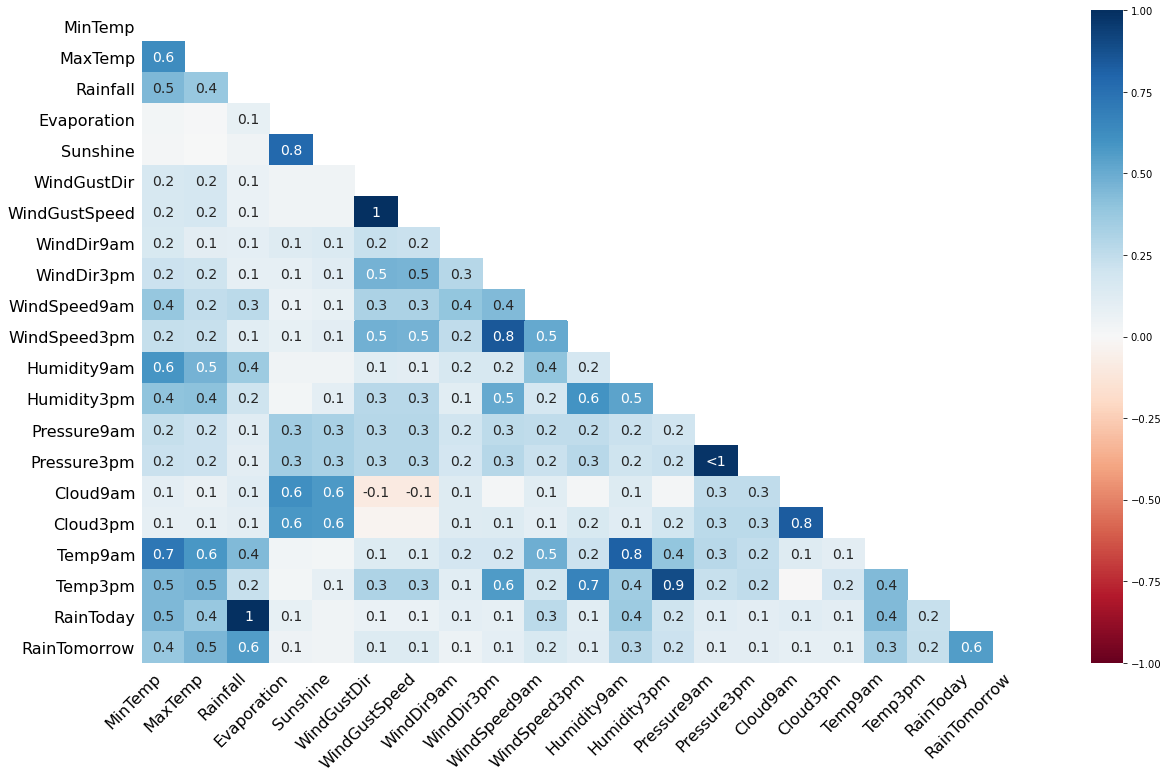

In [9]:
msno.heatmap(df)

In [10]:
#checking total percenatge of missing values

percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})

In [11]:
missing_value_df

,column_name,percent_missing
MinTemp,MinTemp,1.020899
MaxTemp,MaxTemp,0.866905
Rainfall,Rainfall,2.241853
Evaporation,Evaporation,43.166506
Sunshine,Sunshine,48.009762
WindGustDir,WindGustDir,7.098859
WindGustSpeed,WindGustSpeed,7.055548
WindDir9am,WindDir9am,7.263853
WindDir3pm,WindDir3pm,2.906641
WindSpeed9am,WindSpeed9am,1.214767


In [12]:
#Dropping columns cloud9am, cloud3pm, Evaporation, Sunshine as  
#1/3 of their data is missing values
df = df.drop(columns=['Cloud9am', 'Cloud3pm', 'Evaporation', 'Sunshine'], axis = 1)

In [13]:
df.shape

(145460, 17)

In [14]:
df = df.dropna()

In [15]:
df.shape

(112925, 17)

In [16]:
# looking for categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 5 categorical variables

The categorical variables are : ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [17]:
#viewing Categorical variables
df[categorical].head()

,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,W,W,WNW,No,No
1,WNW,NNW,WSW,No,No
2,WSW,W,WSW,No,No
3,NE,SE,E,No,No
4,W,ENE,NW,No,No


Dealing with categorical columns

In [18]:
#RainToday and RainTomorrow are two binary category variables
#Replacing Yes/No to 0/1 for categorical columns RainToday and RainTomorrow
df['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
df['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

In [19]:
#See unique values and convert them to int using pd.getDummies()
categorical_columns = ['WindGustDir', 'WindDir3pm', 'WindDir9am']
for col in categorical_columns:
    print(np.unique(df[col]))
# transform the categorical columns
df = pd.get_dummies(df, columns=categorical_columns)
df.iloc[4:9]

['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']
['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']
['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']


,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,...,0,0,0,0,0,0,0,0,0,0
5,14.6,29.7,0.2,56.0,19.0,24.0,55.0,23.0,1009.2,1005.4,...,0,0,0,0,0,0,0,1,0,0
6,14.3,25.0,0.0,50.0,20.0,24.0,49.0,19.0,1009.6,1008.2,...,0,0,0,0,0,0,1,0,0,0
7,7.7,26.7,0.0,35.0,6.0,17.0,48.0,19.0,1013.4,1010.1,...,0,0,0,0,1,0,0,0,0,0
8,9.7,31.9,0.0,80.0,7.0,28.0,42.0,9.0,1008.9,1003.6,...,0,0,0,1,0,0,0,0,0,0


In [20]:
df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow',
       'WindGustDir_E', 'WindGustDir_ENE', 'WindGustDir_ESE', 'WindGustDir_N',
       'WindGustDir_NE', 'WindGustDir_NNE', 'WindGustDir_NNW',
       'WindGustDir_NW', 'WindGustDir_S', 'WindGustDir_SE', 'WindGustDir_SSE',
       'WindGustDir_SSW', 'WindGustDir_SW', 'WindGustDir_W', 'WindGustDir_WNW',
       'WindGustDir_WSW', 'WindDir3pm_E', 'WindDir3pm_ENE', 'WindDir3pm_ESE',
       'WindDir3pm_N', 'WindDir3pm_NE', 'WindDir3pm_NNE', 'WindDir3pm_NNW',
       'WindDir3pm_NW', 'WindDir3pm_S', 'WindDir3pm_SE', 'WindDir3pm_SSE',
       'WindDir3pm_SSW', 'WindDir3pm_SW', 'WindDir3pm_W', 'WindDir3pm_WNW',
       'WindDir3pm_WSW', 'WindDir9am_E', 'WindDir9am_ENE', 'WindDir9am_ESE',
       'WindDir9am_N', 'WindDir9am_NE', 'WindDir9am_NNE', 'WindDir9am_NNW',
       'WindDir9am_NW', 'W

In [21]:
df.shape

(112925, 62)

In [25]:
#standardizing and scaling the model using min max scaler
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
scaler.fit(df)
df = pd.DataFrame(scaler.transform(df), index=df.index, columns=df.columns)
df.iloc[4:10]

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
4,0.610451,0.652747,0.002720,0.265625,0.058824,0.211765,0.82,0.33,0.500826,0.4624,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.541568,0.595604,0.000544,0.382812,0.200000,0.258824,0.55,0.23,0.474380,0.4528,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,0.534442,0.492308,0.000000,0.335938,0.211765,0.258824,0.49,0.19,0.480992,0.4976,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,0.377672,0.529670,0.000000,0.218750,0.047059,0.176471,0.48,0.19,0.543802,0.5280,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8,0.425178,0.643956,0.000000,0.570312,0.058824,0.305882,0.42,0.09,0.469421,0.4240,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.505938,0.604396,0.003808,0.164062,0.152941,0.105882,0.58,0.27,0.438017,0.4576,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
#splitting column in dependent and independent variable
X = df.drop(['RainTomorrow'], axis=1)

y = df['RainTomorrow']

Logistic Regression

In [28]:
#Training Logistic Regression model on Training set
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time

t0=time.time()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state = 0)
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('Accuracy :',score)
print('Time taken :' , time.time()-t0)

Accuracy : 0.849780391045622
Time taken : 1.4846117496490479


C:\Users\91880\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
#Predicting the test result
y_pred = classifier.predict(X_test)

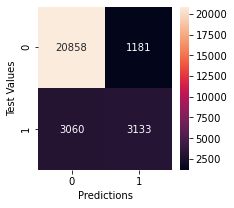

Accuracy score : 0.849780391045622


In [32]:
#Making Confusion matrix 
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)

f, ax = plt.subplots(figsize = (3,3))
sns.heatmap(cm,annot=True,linecolor="blue",fmt=".0f",ax=ax)
plt.xlabel("Predictions")
plt.ylabel("Test Values")
plt.show()
print('Accuracy score :',score)

K-Nearest Neighbor

In [33]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 19)
knn.fit(X_train,y_train.values.ravel())
y_pred_KNN = knn.predict(X_test)
print(" {} nn score: {} ".format(19,knn.score(X_test,y_test)))

 19 nn score: 0.8129073391895721 


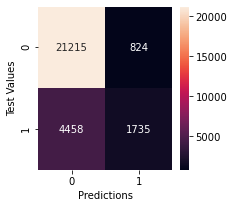

 19 nn score: 0.8129073391895721 


In [34]:
from sklearn.metrics import confusion_matrix

confMatKnn = confusion_matrix(y_test,y_pred_KNN)

f, ax = plt.subplots(figsize = (3,3))
sns.heatmap(confMatKnn,annot=True,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predictions")
plt.ylabel("Test Values")
plt.show()
print(" {} nn score: {} ".format(19,knn.score(X_test,y_test)))